# [Workshop: Software Tools from Atomistics to Phase Diagrams](https://workshop.materialsgenomefoundation.org) 

## Day 1 - Atomistic simulations ([pyiron](https://pyiron.org))
**Authors:  <u>Jan Janssen</u>, Tilmann Hickel, Jörg Neugebauer ([Max-Planck-Institut für Eisenforschung](https://www.mpie.de))**

Interactive: **Density functional theory with pyiron**

The scope of this first exercise is to become familar with:
* Density functional theory calculation, 
* Calculate the equilibrium lattice constant 
* Compare the results to interatomic potentials.

## Reminder
In the first session we learned how to create a pyiron project object and then use this pyiron project object to create atomistic structure objects. 

In [1]:
# Import the Project object
from pyiron import Project

In [2]:
# Create a Project object instance for a project named dft
pr = Project("dft")

In [3]:
# Create a cubic aluminum fcc structure
al_fcc = pr.create_ase_bulk("Al", cubic=True)

In [4]:
# Confirm the final structure has 4 atoms by calculating 
# the length of the structure object
len(al_fcc) == 4

True

# Density Functional Theory 
To provide a brief introduction to density functional theory (DFT) we calculate the equilibrium lattice constant for a cubic fcc aluminium structure. Besides the pseudo potential which defines the electron electron interaction, the DFT precision is dominated by the convergence parameters, namely the plane wave energy cutoff and the kpoint mesh. Both can be set in pyiron using the corresponding properties `encut` and `kpoint_mesh`.  

In [5]:
# Create a DFT job with the S/PHI/nX quantum engine named spx
job_dft_template = pr.create_job(
    job_type=pr.job_type.Sphinx,
    job_name="spx"
)

In [6]:
# Print the default DFT convergence parameters energy cutoff
print(
    job_dft_template.encut, 
    job_dft_template.kpoint_mesh
)

340 [4, 4, 4]


In [7]:
# Increase the energy cutoff to 400eV and increase the kpoint mesh to 5x5x5
job_dft_template.set_encut(400)
job_dft_template.set_kpoints([5, 5, 5])

## Energy Volume Curve 
The discretisation of the plane waves on the fourier mesh and the kpoint mesh in the brillouin zone cause fluctuations in the energy surface. Therefore a minimization like we used it for the interatomic potentials in the previous section is insufficient. Instead we calculate the energy for various volumes around the equlibrium volume and then determine the equilibrium volume by interpolating the minimum between these volumes.

In [8]:
# Import the numerical library numpy
import numpy as np

In [9]:
# Create 7 strains ranging from -5% (-0.05) to +5% (0.05) 
strain_lst = np.linspace(-0.05, 0.05, 7)
strain_lst

array([-0.05      , -0.03333333, -0.01666667,  0.        ,  0.01666667,
        0.03333333,  0.05      ])

In [10]:
# Copy the cubic fcc aluminium supercell
al_fcc_copy = al_fcc.copy()

In [11]:
# Apply of -5% to the copy of the aluminium
# supercell and compare the volume 
al_fcc_copy.apply_strain(-0.05)
al_fcc.get_volume(), al_fcc_copy.get_volume()

(66.43012500000002, 56.95552842187497)

In [12]:
# Iterate over the list of strains 
for strain in strain_lst: 
    job_strain = job_dft_template.copy_to(
        # Define the job name based on the current strain 
        new_job_name="spx_" + str(1 + strain).replace(".", "_"), 
        new_database_entry=False
    )
    
    # Copy the cubic fcc aluminium supercell
    al_fcc_copy = al_fcc.copy()
    
    # Apply the strain of using the for loop
    al_fcc_copy.apply_strain(strain)
    
    # Set the strained structure to the job
    job_strain.structure = al_fcc_copy 
    
    # Execute the job
    job_strain.run()

The job spx_0_95 was saved and received the ID: 80
The job spx_0_9666666666666667 was saved and received the ID: 81
The job spx_0_9833333333333333 was saved and received the ID: 83
The job spx_1_0 was saved and received the ID: 86
The job spx_1_0166666666666666 was saved and received the ID: 88
The job spx_1_0333333333333332 was saved and received the ID: 90
The job spx_1_05 was saved and received the ID: 93


In [13]:
# Check the status of the calculation in the job_table
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,80,finished,Al4,spx_0_95,/spx_0_95,/home/jovyan/,again/dft/,2020-11-09 23:41:13.256220,2020-11-09 23:41:21.308760,8.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,None
1,81,finished,Al4,spx_0_9666666666666667,/spx_0_9666666666666667,/home/jovyan/,again/dft/,2020-11-09 23:41:24.714680,2020-11-09 23:41:34.059832,9.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,None
2,83,finished,Al4,spx_0_9833333333333333,/spx_0_9833333333333333,/home/jovyan/,again/dft/,2020-11-09 23:41:37.460798,2020-11-09 23:41:46.446782,8.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,None
3,86,finished,Al4,spx_1_0,/spx_1_0,/home/jovyan/,again/dft/,2020-11-09 23:41:50.041966,2020-11-09 23:41:58.775547,8.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,None
4,88,finished,Al4,spx_1_0166666666666666,/spx_1_0166666666666666,/home/jovyan/,again/dft/,2020-11-09 23:42:03.158963,2020-11-09 23:42:13.544707,10.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,None
5,90,finished,Al4,spx_1_0333333333333332,/spx_1_0333333333333332,/home/jovyan/,again/dft/,2020-11-09 23:42:17.235563,2020-11-09 23:42:27.693160,10.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,None
6,93,finished,Al4,spx_1_05,/spx_1_05,/home/jovyan/,again/dft/,2020-11-09 23:42:30.796080,2020-11-09 23:42:41.676387,10.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,None


## Reminder
We again use the pyiron table object to collect the simulation results and aggregate them in a pandas DataFrame. 

In [14]:
# Create a pyiron table object
table = pr.create_table()

In [15]:
# Implement a filter function, which returns true 
# for finished jobs and jobs with "spx_" in the job_name
def filter_jobs(job):
    return job.status == "finished" and "spx_" in job.job_name

In [16]:
# Many commonly used functions are already available using tab completion
# We select the get_volume function and the get_energy_tot function
table.add.get_volume
table.add.get_energy_tot

True

In [17]:
# Assigne the filter function defined above
table.filter_function = filter_jobs

In [18]:
# Execute the pyiron table just like a pyiron job object
table.run()

  0%|          | 0/7 [00:00<?, ?it/s]

The job table was saved and received the ID: 96


100%|██████████| 7/7 [00:00<00:00, 20.82it/s]


In [19]:
# Return a pandas DataFrame with the collected results 
df_res = table.get_dataframe()
df_res

,job_id,energy_tot,volume
0,80,-228.372001,56.955535
1,81,-228.628643,60.006065
2,83,-228.767808,63.163733
3,86,-228.808252,66.430169
4,88,-228.766751,69.807298
5,90,-228.660757,73.297048
6,93,-228.510517,76.901197


## Visualise the energy volume curve 
We again use the matplotlib library to visualise the calculated energy volume curve and calculate the equilibrium volume by fitting a second order polynomial and calculate the roots of the derivative. 

In [20]:
# Fit a second order polynomial to the energy volume curve 
fit = np.polyfit(df_res.volume, df_res.energy_tot, 2)

In [21]:
# Get the polynomial of the fit 
fit_poly = np.poly1d(fit)

# Calculate the roots of the derivate of the polynomial
vol_roots = np.polyder(fit_poly).roots

# Select the root within the volume range which is
# smaller (<) than maximum volume and larger (>) than 
# the minimum volume. 
vol_eq = vol_roots[
    (vol_roots < df_res["volume"].max()) & 
    (vol_roots > df_res["volume"].min())
][0]

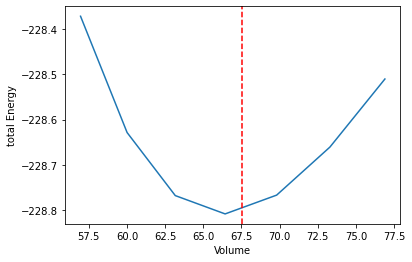

In [22]:
# Import the matplotlib library for plotting. 
import matplotlib.pyplot as plt

# Plot the volume and the total energy from the DataFrame 
# with the collected results
plt.plot(df_res.volume, df_res.energy_tot)

# Plot the fitted equilibrium volume
plt.axvline(vol_eq, linestyle="--", color="red")
plt.xlabel("Volume")
plt.ylabel("total Energy");

## pyiron Master Jobs 
While managing calculations with with for loops and aggregating calculation results in pandas DataFrame is already a very scaleable concept, we have implemented master jobs which can execute multiple calculations in series or in parallel to automate common simulation tasks. The calculation of the energy volume curve is one of those examples. 

In [23]:
# Create a DFT job with the S/PHI/nX quantum engine named "spxjob"
job_master_template = pr.create_job(
    job_type=pr.job_type.Sphinx,
    job_name="spxjob"
)

In [24]:
# Assign the cubic fcc aluminium structure to the template job 
job_master_template.structure = al_fcc

In [25]:
# Use the job object to create the Murnaghan object, named "murn" 
murn = job_master_template.create_job(
    job_type=pr.job_type.Murnaghan, 
    job_name="murn"
)

In [26]:
# Execute the Murnaghan object 
murn.run()

The job murn was saved and received the ID: 97
The job strain_0_9 was saved and received the ID: 99
The job strain_0_92 was saved and received the ID: 101
The job strain_0_94 was saved and received the ID: 104
The job strain_0_96 was saved and received the ID: 107
The job strain_0_98 was saved and received the ID: 109
The job strain_1_0 was saved and received the ID: 112
The job strain_1_02 was saved and received the ID: 114
The job strain_1_04 was saved and received the ID: 117
The job strain_1_06 was saved and received the ID: 119
The job strain_1_08 was saved and received the ID: 121
The job strain_1_1 was saved and received the ID: 123
job_id:  99 finished
job_id:  101 finished
job_id:  104 finished
job_id:  107 finished
job_id:  109 finished
job_id:  112 finished
job_id:  114 finished
job_id:  117 finished
job_id:  119 finished
job_id:  121 finished
job_id:  123 finished


In [27]:
# Check the status of the calculation in the job_table
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,80,finished,Al4,spx_0_95,/spx_0_95,/home/jovyan/,again/dft/,2020-11-09 23:41:13.256220,2020-11-09 23:41:21.308760,8.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,NaN
1,81,finished,Al4,spx_0_9666666666666667,/spx_0_9666666666666667,/home/jovyan/,again/dft/,2020-11-09 23:41:24.714680,2020-11-09 23:41:34.059832,9.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,NaN
2,83,finished,Al4,spx_0_9833333333333333,/spx_0_9833333333333333,/home/jovyan/,again/dft/,2020-11-09 23:41:37.460798,2020-11-09 23:41:46.446782,8.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,NaN
3,86,finished,Al4,spx_1_0,/spx_1_0,/home/jovyan/,again/dft/,2020-11-09 23:41:50.041966,2020-11-09 23:41:58.775547,8.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,NaN
4,88,finished,Al4,spx_1_0166666666666666,/spx_1_0166666666666666,/home/jovyan/,again/dft/,2020-11-09 23:42:03.158963,2020-11-09 23:42:13.544707,10.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,NaN
5,90,finished,Al4,spx_1_0333333333333332,/spx_1_0333333333333332,/home/jovyan/,again/dft/,2020-11-09 23:42:17.235563,2020-11-09 23:42:27.693160,10.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,NaN
6,93,finished,Al4,spx_1_05,/spx_1_05,/home/jovyan/,again/dft/,2020-11-09 23:42:30.796080,2020-11-09 23:42:41.676387,10.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,NaN
7,96,finished,None,table,/table,/home/jovyan/,again/dft/,2020-11-09 23:42:42.765351,2020-11-09 23:42:43.353128,0.0,pyiron@jupyter-jan#1,TableJob,0.1,None,NaN
8,97,finished,Al4,murn,/murn,/home/jovyan/,again/dft/,2020-11-09 23:42:45.402252,2020-11-09 23:45:04.799115,139.0,pyiron@jupyter-jan#1#11/11,Murnaghan,0.3.0,None,NaN
9,99,finished,Al4,strain_0_9,/strain_0_9,/home/jovyan/,again/dft/murn_hdf5/,2020-11-09 23:42:50.848222,2020-11-09 23:42:59.241386,8.0,pyiron@jupyter-jan#1,Sphinx,2.6.1,None,97.0


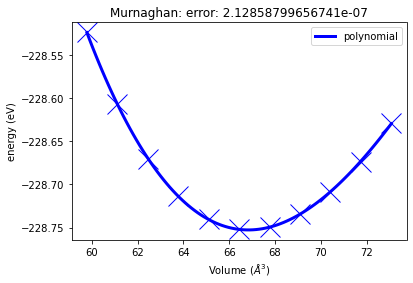

In [28]:
# Finally we can use the internal functionality of the master job 
# to visualise the energy volume curve
murn.plot()

## Summary 
In this section you learned: 
* how to calculate equilibrium bulk material properties using density functional theory.
* how the finite plane wave energy cutoff and the finite kpoint mesh limit the precision of DFT calculation. 
* and how to use master jobs in pyiron to automate common tasks like calculating energy volume curves. 

Suggestions: 
* To learn more about convergence you can plot the convergence of an individual energy over the change in plane wave energy cutoff or kpoint mesh. 
* To visualise the discretisation of the energy volume curve you can calculate the energy volume curve at a small volume range of +/- 1% for a low kpoint mesh of 3x3x3 and an energy cutoff of 300eV with 21 points.
* To validate the interatomic potentials from the previous section we can calculate energy volume curves for those and compare the energy differences to the DFT results. 